In [35]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import Angle, SkyCoord
import astropy.units as u
import geoviews
import pandas as pd

In [3]:
# tbl = fits.open("/users/elowe/repos/antenna-plots/stack_table.fits")
# antenna_data=Table(tbl[1].data).to_pandas()
# tbl.close()
import pandas as pd
filename = "/home/scratch/elowe/antenna_data/ant_pos_with_az_al_small.parquet"
antenna_data = pd.read_parquet(filename)
antenna_data.head()

,DMJD,RAJ2000,DECJ2000,azimuth,altitude
317883992,52516.795752,-158.088234,30.510830,327.993101,-12.987242
317886399,52516.820301,29.804136,65.916834,25.129776,55.732472
317888605,52516.833310,30.386129,66.578424,22.351049,56.619825
317890811,52516.848877,-90.316225,-2.460979,270.910963,-5.106617
317892816,52516.861331,-90.161016,-1.639626,274.275001,-7.991746


In [4]:
points = geoviews.Points(antenna_data, ["RAJ2000", "DECJ2000"])

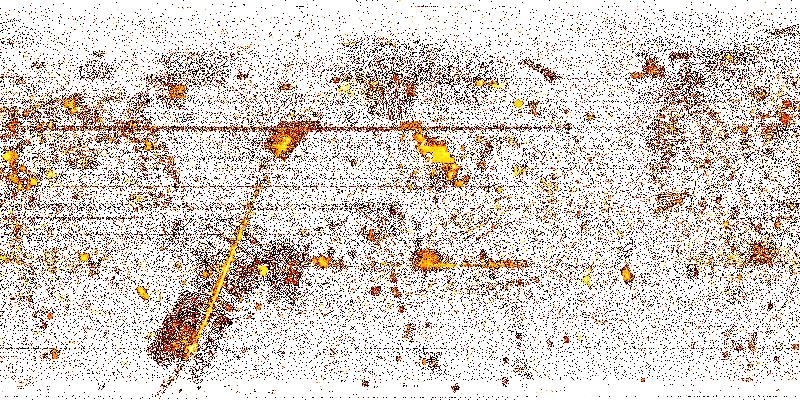

In [5]:
import datashader
import colorcet as cc

canvas = datashader.Canvas(
    plot_width=800,
    plot_height=400
)
canvas_points = canvas.points(points.data, "RAJ2000", "DECJ2000")
shaded_points = datashader.transfer_functions.shade(canvas_points, cmap=cc.fire)
shaded_points

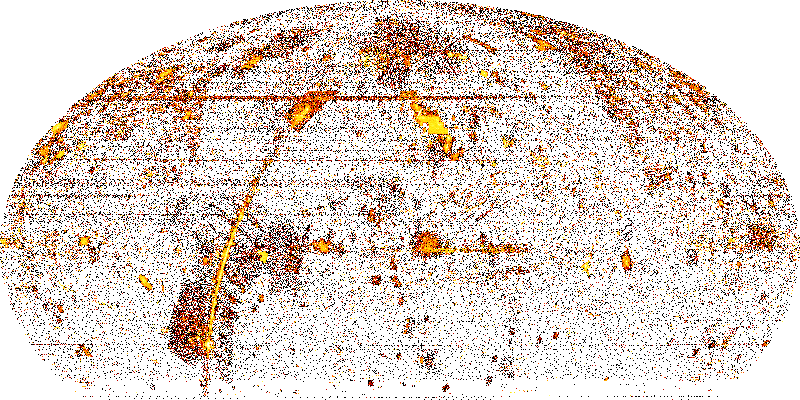

In [6]:
from cartopy import crs
projected = geoviews.operation.project_points(points, projection=crs.Mollweide())
canvas = datashader.Canvas(
    plot_width=800,
    plot_height=400
)
canvas_points = canvas.points(projected.data, "RAJ2000", "DECJ2000")
shaded_points = datashader.transfer_functions.shade(canvas_points, cmap=cc.fire)
shaded_points

In [7]:
projected.opts(projection=crs.Mollweide(), width=1000, height=500)

:Points   [RAJ2000,DECJ2000]   (DMJD,azimuth,altitude)

In [8]:
# Frame for RA and DEC
sc = SkyCoord(antenna_data['RAJ2000'], antenna_data['DECJ2000'], unit=u.deg, frame="icrs", equinox="J2000")
sc

<SkyCoord (ICRS): (ra, dec) in deg
    [(201.91176613,  30.5108304 ), ( 29.80413552,  65.91683433),
     ( 30.38612903,  66.57842444), ..., (257.2901107 , -21.23518613),
     (257.7374326 , -20.4250683 ), (257.25803298, -20.75061686)]>

In [9]:
# Getskycoord into a dataframe
galactic_df = sc.galactic.to_table().to_pandas()
galactic_df

,l,b
0,58.170213,81.381489
1,129.778556,3.950132
2,129.829813,4.650153
3,24.623711,10.550116
4,25.435340,10.800201
...,...,...
318413,355.892307,6.876051
318414,0.983389,11.006530
318415,1.902888,11.121180
318416,2.823939,11.242219


In [10]:
# Get points for geoview
sc_points = geoviews.Points(galactic_df, ['l', 'b'])

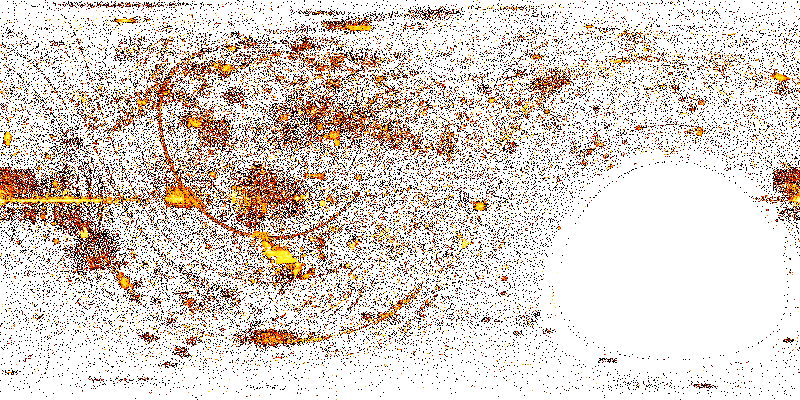

In [11]:
# Shade the points on canvas
sc_canvas = datashader.Canvas(
    plot_width=800,
    plot_height=400
)
sc_canvas_points = sc_canvas.points(sc_points.data, "l", "b")
sc_shaded_points = datashader.transfer_functions.shade(sc_canvas_points, cmap=cc.fire)
sc_shaded_points

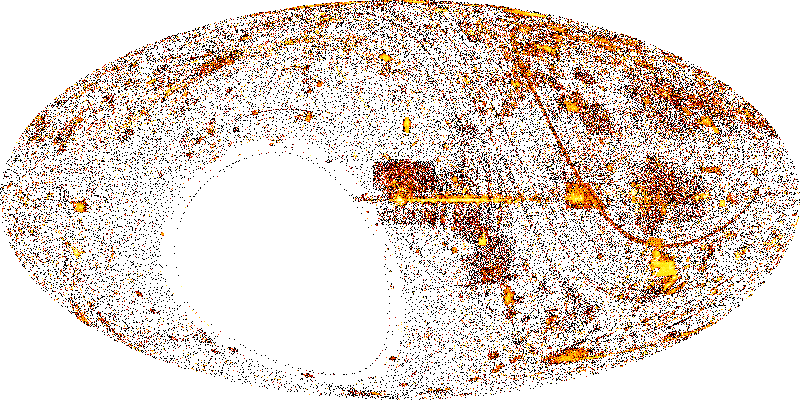

In [22]:
# Project the points on Mollweide
projected = geoviews.operation.project_points(sc_points, projection=crs.Mollweide())
sc_canvas = datashader.Canvas(
    plot_width=800,
    plot_height=400
)
sc_canvas_points = sc_canvas.points(projected.data, "l", "b")
sc_shaded_points = datashader.transfer_functions.shade(sc_canvas_points, cmap=cc.fire)
sc_shaded_points

In [26]:
# Frame for azi and alt
sc_azi_alt = SkyCoord(antenna_data['azimuth'], antenna_data['altitude'], unit=u.deg)
sc_azi_alt

<SkyCoord (ICRS): (ra, dec) in deg
    [(327.99310146, -12.98724237), ( 25.12977647,  55.73247177),
     ( 22.35104949,  56.61982503), ..., ( 11.60801528, -72.53553392),
     ( 22.07637974, -70.87332658), ( 34.54010726, -69.3961652 )]>

In [27]:
# Getting values from skycoord to dataframe
azi_df = sc_azi_alt.to_table().to_pandas()
azi_df

,ra,dec
0,327.993101,-12.987242
1,25.129776,55.732472
2,22.351049,56.619825
3,270.910963,-5.106617
4,274.275001,-7.991746
...,...,...
318413,335.085598,-79.243514
318414,359.654403,-73.634506
318415,11.608015,-72.535534
318416,22.076380,-70.873327


In [44]:
az_el_points = geoviews.Points(azi_df, ['ra', 'dec'])

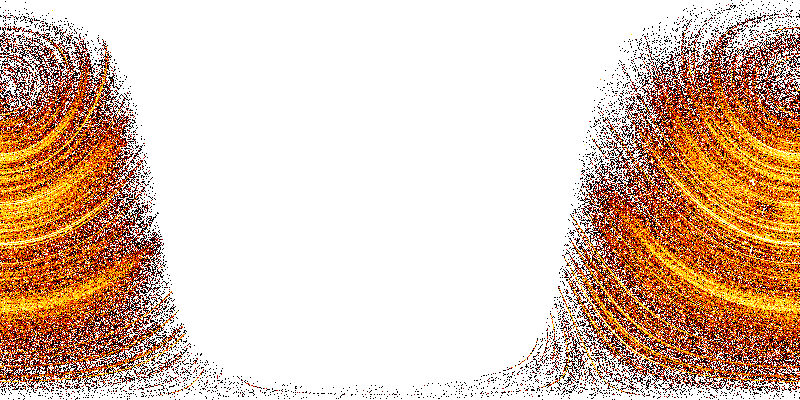

In [45]:
# Shade the points
az_el_canvas = datashader.Canvas(
    plot_width=800,
    plot_height=400
)
az_el_canvas_points = sc_canvas.points(az_el_points.data, "ra", "dec")
az_el_shaded = datashader.transfer_functions.shade(az_el_canvas_points, cmap=cc.fire)
az_el_shaded

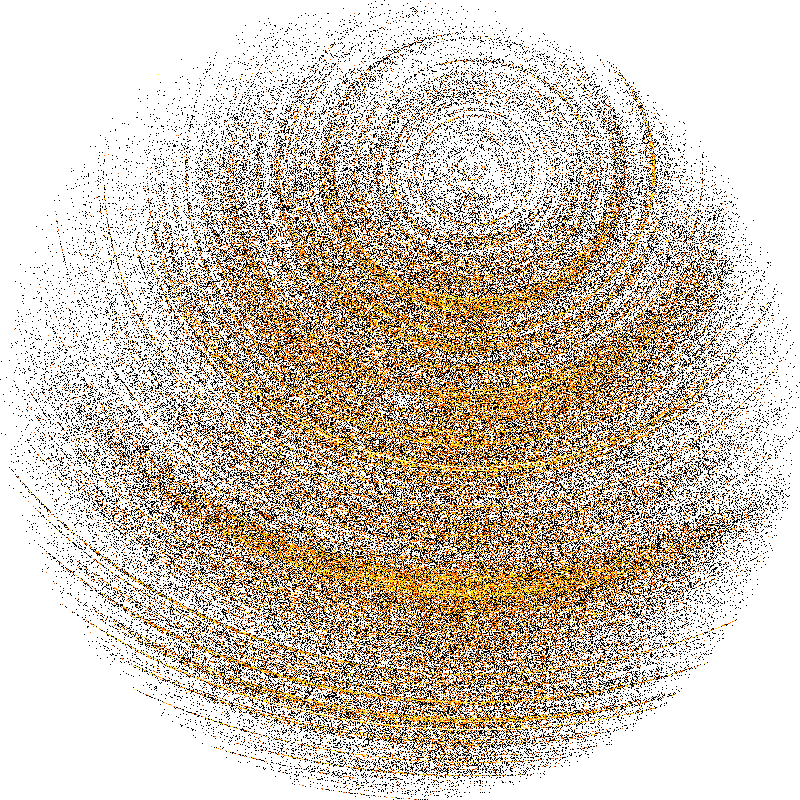

In [47]:
# Project the points on AzimuthalEquidistant
az_el_points = geoviews.Points(azi_df, ['ra', 'dec'])

projected = geoviews.operation.project_points(az_el_points, projection=crs.crs.AzimuthalEquidistant())
az_el_canvas = datashader.Canvas(
    plot_width=800,
    plot_height=800
)
az_el_canvas_points = az_el_canvas.points(projected.data, "ra", "dec")
az_el_points = datashader.transfer_functions.shade(az_el_canvas_points, cmap=cc.fire)
az_el_points